In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')

import shutil
from train import run
import os
import itertools
import glob

def write_errormsg2file(msg, error_file_name):
    if not os.path.isfile(error_file_name):
        with open(error_file_name, 'w') as f:
            f.write(f'error : {msg}\n')
    else:
        with open(error_file_name, 'a') as f:
            f.write(f'error : {msg}\n')
            
def do_exps(exps_dict= None, general_opts= None, device= None, exp_dir = '../figs/test', save_special= False):    
    exp_idx = 0
    keys= list(exps.keys())
    
    val_list_list= []
    key_list = [] #eg: 'MODEL.MODEL_A.rotation_lambda'
    key_suffix_list= [] # eg: 'rotation_lambda'
    
    for key, val_list in exps_dict.items():
        key_list.append(key)
        key_suffix_list.append(key.split('.')[-1])
        
        val_list_list.append(val_list)
        
    attr_combination_list = [list(s) for s in itertools.product(*val_list_list)]
    
    print(f'number of total experiments : {len(attr_combination_list)}')
    
    count_already_trained=0
    count_train_from_begining=0
    for attr_combination in attr_combination_list:
        save_dir = f'{exp_dir}/'
        opts= []
        for idx in range(len(attr_combination)):
            opts += [key_list[idx], attr_combination[idx]]
            attr= attr_combination[idx]
            
            #####
            attr_is_list= False
            try:attr_is_list = isinstance(eval(attr), list)
            except:pass
            if attr_is_list:
                attr= '_'.join(list(map(str, eval(attr)))) ## [, ] should not be in the directory name because glob is sensitive to that !
            #####
            
            save_dir+= f'{key_suffix_list[idx]}({attr})@'
    
        save_dir = save_dir[:-1] # remove last '@' 

        exp_idx+=1
        opts_other= ['NAME', f'exp_idx({exp_idx})', 
                     'GENERAL.device', device, 
                     'GENERAL.save_dir', save_dir
                    ]
                     
        opts_other+= general_opts

        opts = opts_other + opts

        
        if len(glob.glob(f'{save_dir}/1_*.jpg'))!=0:
            count_already_trained+=1
            print(f'PASSING :: {save_dir}')
            continue
        
        count_train_from_begining+=1
                    
        try:shutil.rmtree(save_dir)
        except:pass

        save_folder_name= save_dir.split('/')[-1]
        if len(save_folder_name)>255:
            print(f'\nFolder length is too long: len(results_saving_folder) -> {len(save_folder_name)} (<= 255)')
            print(save_folder_name)
        
        run(opts= opts, save_special=save_special)
        #try:
        #    run(opts= opts, save_special=save_special)
        #except Exception as e:
        #    error_file_name = f'{exp_dir}/errors.txt'
        #    write_errormsg2file(f'ERROR : {save_dir}\n {e} \n\n', error_file_name)
        #    print(f'ERROR : {save_dir}\n {e} \n\n')
    print('count_already_trained : ', count_already_trained)
    print('count_train_from_begining : ', count_train_from_begining)

In [3]:
exp_dir= '../figs/test_gpumem'
!rm -rf $exp_dir
!mkdir $exp_dir

In [ ]:
device = 'cuda:0'

exps = {
        'DATASET.name': ['confocal'], 
        'DATASET.batch_size_train': [32, 96],  # T= 1: 196, T= 32
    
        'MODEL.MODEL_A.rotation_lambda': ['10.0'], # '10.0'
        'MODEL.MODEL_A.lambda_scale_factor': ['4', '8'], #'8'  
        'MODEL.MODEL_H.T': ['2'], #, '16', '8', '4', '2', '1'
        'MODEL.MODEL_H.lr_H': ['1.0'], # '0.0'
        'MODEL.MODEL_H.H_init': ['hadamard_FourierBased'],
    
        
        'DATASET.img_size':  ['256'],
        'DATASET.num_samples_train': ['3000'],
        'MODEL.MODEL_DECODER.upsample_net': ['learnable_transpose_conv']} #'custom_v2' -> check what is better !!!

general_opts= ['TRAIN.show_results_epoch', '5',
                'TRAIN.epochs', '150']

do_exps(exps, general_opts, device, exp_dir = exp_dir, save_special= True)

number of total experiments : 1
Overide opts :  ['NAME', 'exp_idx(1)', 'GENERAL.device', 'cuda:0', 'GENERAL.save_dir', '../figs/test_gpumem/name(confocal)@batch_size_train(128)@rotation_lambda(10.0)@lambda_scale_factor(8)@T(32)@lr_H(1.0)@H_init(hadamard_FourierBased)@img_size(256)@num_samples_train(3000)@upsample_net(learnable_transpose_conv)', 'TRAIN.show_results_epoch', '5', 'TRAIN.epochs', '150', 'DATASET.name', 'confocal', 'DATASET.batch_size_train', 128, 'MODEL.MODEL_A.rotation_lambda', '10.0', 'MODEL.MODEL_A.lambda_scale_factor', '8', 'MODEL.MODEL_H.T', '32', 'MODEL.MODEL_H.lr_H', '1.0', 'MODEL.MODEL_H.H_init', 'hadamard_FourierBased', 'DATASET.img_size', '256', 'DATASET.num_samples_train', '3000', 'MODEL.MODEL_DECODER.upsample_net', 'learnable_transpose_conv']
DATASET:
  batch_size_train: 128
  delta: 1e-06
  img_channels: 1
  img_size: 256
  name: confocal
  num_samples_train: 3000
GENERAL:
  device: cuda:0
  save_dir: ../figs/test_gpumem/name(confocal)@batch_size_train(128)@ro

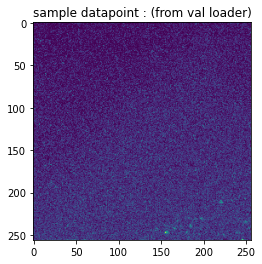

dataset value range :  1.0000001111620804e-06 1.0
decoder_upsample_net is a torch.nn.modules.module.Module
device : cuda:0
m : 1
after 1 epochs... yt_down range (train): [166.30992126464844 10354.7724609375]
after 1 epochs... yt_down range (test): [231.91647338867188 9416.1005859375]
training loop time (for epoch: 1): 48.525251150131226 sec
validation loop time (for epoch: 1): 12.619457006454468 sec


m : 1
after 2 epochs... yt_down range (train): [112.56587982177734 9374.3857421875]
after 2 epochs... yt_down range (test): [230.80230712890625 9483.353515625]
training loop time (for epoch: 2): 47.14679789543152 sec
validation loop time (for epoch: 2): 12.247825860977173 sec


m : 1


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [4]:
device = 'cuda:0'

exps = {
        'DATASET.name': ['confocal'], 
        'DATASET.batch_size_train': [128],  # T= 1: 196, T= 32
    
        'MODEL.MODEL_A.rotation_lambda': ['10.0'], # '10.0'
        'MODEL.MODEL_A.lambda_scale_factor': ['8'], #'8'  
        'MODEL.MODEL_H.T': ['32'], #, '16', '8', '4', '2', '1'
        'MODEL.MODEL_H.lr_H': ['1.0'], # '0.0'
        'MODEL.MODEL_H.H_init': ['hadamard_FourierBased'],
    
        
        'DATASET.img_size':  ['256'],
        'DATASET.num_samples_train': ['3000'],
        'MODEL.MODEL_DECODER.upsample_net': ['learnable_transpose_conv']} #'custom_v2' -> check what is better !!!

general_opts= ['TRAIN.show_results_epoch', '5',
                'TRAIN.epochs', '150']

do_exps(exps, general_opts, device, exp_dir = exp_dir, save_special= True)